### Aim: The dataset is hosted by city of Los Angeles named as "Metro Bike Share Trip Data". I will be analyzing the use of metro bikes in order to build a bike network that really works.

# Introduction
This dataset is a catalogue of rides taken on the LA-Metro Bike Share Network.The Metro Bike Share system makes bikes available 24/7, 365 days a year in Downtown LA, Central LA, Port of LA and the Westside. Metro Bike Share offers convenient round-the-clock access to a fleet of bicycles for short trips. Metro Bike Share is one of LA Metro's multiple public transportation options for Angelenos and visitors to get around.

Feature descriptions from https://bikeshare.metro.net/about/data/

* trip_id: Locally unique integer that identifies the trip

* duration: Length of trip in seconds

* start_time: The date/time when the trip began, presented in ISO 8601 format in local time

* end_time: The date/time when the trip ended, presented in ISO 8601 format in local time

* start_station: The station ID where the trip originated

* start_lat: The latitude of the station where the trip originated

* start_lon: The longitude of the station where the trip originated

* end_station: The station ID where the trip terminated

* end_lat: The latitude of the station where the trip terminated

* end_lon: The longitude of the station where the trip terminated

* bike_id: Locally unique integer that identifies the bike

* plan_duration: The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)

* trip_route_category: "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

* passholder_type: The name of the passholder's plan

Other features are not officially described by Metro Bike Share

Remaining features appear to be LA geographic information which i think is not relevant to my analysis, many of which include large amounts of missing data. So i have dropped those columns.


In [1]:
!pip install folium

In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from Khatavkar_Ankit_Capstone_Project_Code import distance_on_unit_sphere
from Khatavkar_Ankit_Capstone_Project_Code import modeling_techniques_and_prediction

# Data Extraction

In [3]:
metro_bike_trip_df =  pd.read_csv("https://data.lacity.org/api/views/sii9-rjps/rows.csv?accessType=DOWNLOAD")
metro_bike_trip_df.head(6)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,01/19/2017 05:05:00 PM,01/19/2017 09:16:00 PM,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,10/09/2016 02:37:00 PM,10/10/2016 12:03:00 PM,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,02/18/2017 10:15:00 AM,02/20/2017 03:20:00 PM,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,02/27/2017 12:26:00 PM,02/27/2017 05:40:00 PM,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,02/27/2017 08:26:00 PM,03/01/2017 09:49:00 AM,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9378284,60,10/09/2016 09:40:00 AM,10/09/2016 09:41:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Replacing the column name space with "_" for easier name conversion
metro_bike_trip_df.columns = metro_bike_trip_df.columns.str.replace(' ','_')
metro_bike_trip_df.head(5)

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,...,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,Neighborhood_Councils_(Certified),Council_Districts,Zip_Codes,LA_Specific_Plans,Precinct_Boundaries,Census_Tracts
0,18222186,15060,01/19/2017 05:05:00 PM,01/19/2017 09:16:00 PM,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,10/09/2016 02:37:00 PM,10/10/2016 12:03:00 PM,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,02/18/2017 10:15:00 AM,02/20/2017 03:20:00 PM,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,02/27/2017 12:26:00 PM,02/27/2017 05:40:00 PM,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,02/27/2017 08:26:00 PM,03/01/2017 09:49:00 AM,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
Trip_ID                              132427 non-null int64
Duration                             132427 non-null int64
Start_Time                           132427 non-null object
End_Time                             132427 non-null object
Starting_Station_ID                  132408 non-null float64
Starting_Station_Latitude            132379 non-null float64
Starting_Station_Longitude           132379 non-null float64
Ending_Station_ID                    132331 non-null float64
Ending_Station_Latitude              131376 non-null float64
Ending_Station_Longitude             131376 non-null float64
Bike_ID                              132417 non-null float64
Plan_Duration                        131661 non-null float64
Trip_Route_Category                  132427 non-null object
Passholder_Type                      132427 non-null object
Starting_Lat-Long                    98622 

In [6]:
print("shape:", metro_bike_trip_df.shape)

shape: (132427, 22)


In [7]:
# Changing Start and End Time values to datetime format
metro_bike_trip_df['Start_Time']=pd.to_datetime(metro_bike_trip_df['Start_Time'])
metro_bike_trip_df['End_Time']=pd.to_datetime(metro_bike_trip_df['End_Time'])
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
Trip_ID                              132427 non-null int64
Duration                             132427 non-null int64
Start_Time                           132427 non-null datetime64[ns]
End_Time                             132427 non-null datetime64[ns]
Starting_Station_ID                  132408 non-null float64
Starting_Station_Latitude            132379 non-null float64
Starting_Station_Longitude           132379 non-null float64
Ending_Station_ID                    132331 non-null float64
Ending_Station_Latitude              131376 non-null float64
Ending_Station_Longitude             131376 non-null float64
Bike_ID                              132417 non-null float64
Plan_Duration                        131661 non-null float64
Trip_Route_Category                  132427 non-null object
Passholder_Type                      132427 non-null object
Starting_Lat-Long          

# Data Cleaning

In [8]:
# Finding the null values in each column
metro_bike_trip_df.isnull().sum()

Trip_ID                                   0
Duration                                  0
Start_Time                                0
End_Time                                  0
Starting_Station_ID                      19
Starting_Station_Latitude                48
Starting_Station_Longitude               48
Ending_Station_ID                        96
Ending_Station_Latitude                1051
Ending_Station_Longitude               1051
Bike_ID                                  10
Plan_Duration                           766
Trip_Route_Category                       0
Passholder_Type                           0
Starting_Lat-Long                     33805
Ending_Lat-Long                        1051
Neighborhood_Councils_(Certified)     33837
Council_Districts                     33837
Zip_Codes                             33837
LA_Specific_Plans                    116608
Precinct_Boundaries                    1099
Census_Tracts                          1099
dtype: int64

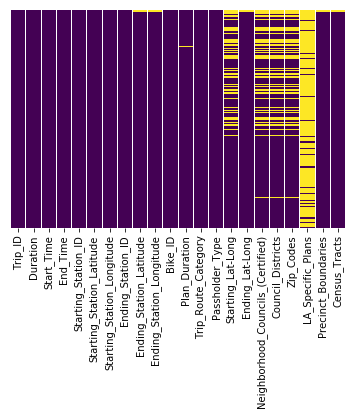

In [9]:
# Visually representing the null values of different columns using heatmap
sns.heatmap(metro_bike_trip_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [10]:
# Dropping below columns due to lack of data and more of null values
metro_bike_trip_df.drop(columns=['Neighborhood_Councils_(Certified)',
                 'Council_Districts',
                 'Zip_Codes',
                 'LA_Specific_Plans',
                 'Precinct_Boundaries',
                 'Census_Tracts'],
       inplace=True)

In [11]:
# Droping the na values from the metro bike trip data
metro_bike_trip_df = metro_bike_trip_df.dropna()
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97825 entries, 2088 to 132426
Data columns (total 16 columns):
Trip_ID                       97825 non-null int64
Duration                      97825 non-null int64
Start_Time                    97825 non-null datetime64[ns]
End_Time                      97825 non-null datetime64[ns]
Starting_Station_ID           97825 non-null float64
Starting_Station_Latitude     97825 non-null float64
Starting_Station_Longitude    97825 non-null float64
Ending_Station_ID             97825 non-null float64
Ending_Station_Latitude       97825 non-null float64
Ending_Station_Longitude      97825 non-null float64
Bike_ID                       97825 non-null float64
Plan_Duration                 97825 non-null float64
Trip_Route_Category           97825 non-null object
Passholder_Type               97825 non-null object
Starting_Lat-Long             97825 non-null object
Ending_Lat-Long               97825 non-null object
dtypes: datetime64[ns](2), float6

In [12]:
# Change format of station and bike ID's to integer.
metro_bike_trip_df['Starting_Station_ID'] = metro_bike_trip_df.Starting_Station_ID.astype(int)
metro_bike_trip_df['Ending_Station_ID'] = metro_bike_trip_df.Ending_Station_ID.astype(int)
metro_bike_trip_df['Bike_ID'] = metro_bike_trip_df.Bike_ID.astype(int)
metro_bike_trip_df.head(5)

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long
2088,2023364,1980,2016-07-08 09:24:00,2016-07-08 09:57:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,5833,30.0,Round Trip,Monthly Pass,"(34.028511, -118.25667)","(34.028511, -118.25667)"
2089,2027211,180,2016-07-08 10:40:00,2016-07-08 10:43:00,4108,0.000000,0.00000,4108,0.000000,0.00000,6065,30.0,Round Trip,Monthly Pass,"(0.0, 0.0)","(0.0, 0.0)"
2090,2035311,780,2016-07-08 12:42:00,2016-07-08 12:55:00,3029,34.048851,-118.24642,3029,34.048851,-118.24642,6011,0.0,Round Trip,Walk-up,"(34.048851, -118.24642)","(34.048851, -118.24642)"
2091,2182651,4440,2016-07-09 19:08:00,2016-07-09 20:22:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,6623,30.0,Round Trip,Monthly Pass,"(34.028511, -118.25667)","(34.028511, -118.25667)"
2092,2286870,5220,2016-07-10 10:56:00,2016-07-10 12:23:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,6210,30.0,Round Trip,Monthly Pass,"(34.028511, -118.25667)","(34.028511, -118.25667)"


In [13]:
# Now we will find the total number of stations and total number of bikes 
print("Total number of Starting stations:", metro_bike_trip_df.Starting_Station_ID.nunique())
print("Total number of Ending stations:", metro_bike_trip_df.Ending_Station_ID.nunique())
print("Total number of bikes:",metro_bike_trip_df.Bike_ID.nunique())

Total number of Starting stations: 64
Total number of Ending stations: 64
Total number of bikes: 762


# Performing Exploratory Data Analysis for the Bike Trip Data

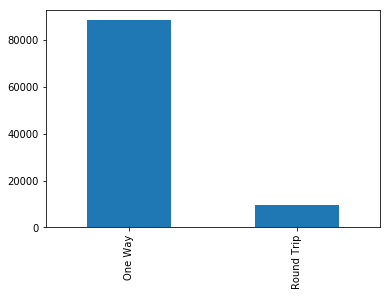

In [14]:
# Finding the trip route category and ploting it in the form of bar graph
metro_bike_trip_df.Trip_Route_Category.value_counts().plot(kind='bar')
plt.show()

#### As we can see the maximum trip is one way which basically means people usually start at one location and end on different location.  

In [15]:
#Busiest Bike by Times 
bike_use_df = pd.DataFrame()
bike_use_df = metro_bike_trip_df.groupby(['Bike_ID']).size().reset_index(name = 'Number of Times Used')
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False)
bike_use_df = bike_use_df[:10]
bike_use_df['Bike_ID'] = bike_use_df['Bike_ID'].astype(str)
bike_use_df['Bike_ID'] = ('Bike ' + bike_use_df['Bike_ID'])
bike_use_df = bike_use_df.reset_index()

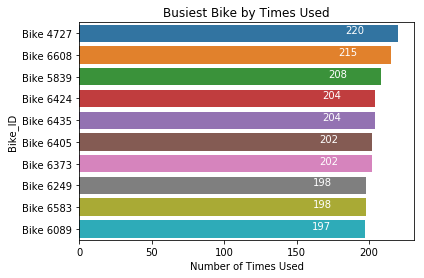

In [16]:
#Visual of most used bike based on Number of Trips
g = sns.barplot('Number of Times Used','Bike_ID', data = bike_use_df)
plt.title("Busiest Bike by Times Used")
for index, row in bike_use_df.iterrows():
    g.text(row['Number of Times Used']-30,index,row['Number of Times Used'], 
             color='white', ha="center",fontsize = 10)
plt.show()

#### We found the most used bikes, now using the most used bike we will find the popular starting and ending location.

In [17]:
# Finding the most used 5 bikes for maximumn duration  
print("Most used 5 bikes: \n",metro_bike_trip_df.Bike_ID.value_counts().head())

#popular start station and end station
print("\nPopular 5 Start stations: \n",metro_bike_trip_df.Starting_Station_ID.value_counts().head())
print("\nPopular 5 End stations: \n",metro_bike_trip_df.Ending_Station_ID.value_counts().head())

#Finding the maximum and minimum trip duration
print("\nThe maximum trip duration:",metro_bike_trip_df.Duration.max())
print("\nThe minimum trip duration:",metro_bike_trip_df.Duration.min())


Most used 5 bikes: 
 4727    220
6608    215
5839    208
6435    204
6424    204
Name: Bike_ID, dtype: int64

Popular 5 Start stations: 
 3030    3787
3069    3715
3005    3609
3014    3504
3031    3450
Name: Starting_Station_ID, dtype: int64

Popular 5 End stations: 
 3005    4621
3031    4175
3014    4091
3042    3862
3069    3622
Name: Ending_Station_ID, dtype: int64

The maximum trip duration: 86400

The minimum trip duration: 60


#### Our next job is to find the locations of the stations

In [18]:
metro_bike_trip_df.describe()

,Trip_ID,Duration,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration
count,9.782500e+04,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000
mean,8.451622e+06,1362.632660,3042.013381,34.036438,-118.211313,3041.549686,34.030413,-118.191664,6193.698165,45.293023
std,4.111857e+06,4684.200072,29.754369,0.615729,2.138390,33.035485,0.754025,2.618753,291.580833,91.142513
min,1.912818e+06,60.000000,3005.000000,0.000000,-118.270813,3005.000000,0.000000,-118.270813,4727.000000,0.000000
25%,5.050112e+06,360.000000,3024.000000,34.044170,-118.256980,3022.000000,34.044159,-118.256980,5957.000000,0.000000
50%,7.080477e+06,600.000000,3038.000000,34.046822,-118.250954,3038.000000,34.046810,-118.251579,6186.000000,30.000000
75%,1.195715e+07,1080.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238937,6431.000000,30.000000
max,1.710164e+07,86400.000000,4108.000000,34.064281,0.000000,4108.000000,34.064281,0.000000,6728.000000,365.000000


#### Starting Station Latitude, Starting Station Longitude, Ending Station Latitude & Ending Station Longitude contain zeros that must be treated as missing data. However, there are no zeros or any remaining missing values in Starting Station ID or Ending Station ID, we can use these values to impute the missing data

In [19]:
print(metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_Latitude']==0]['Starting_Station_ID'].value_counts())
print(metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_Longitude']==0]['Starting_Station_ID'].value_counts())
print(metro_bike_trip_df.loc[metro_bike_trip_df['Ending_Station_Latitude']==0]['Ending_Station_ID'].value_counts())
print(metro_bike_trip_df.loc[metro_bike_trip_df['Ending_Station_Longitude']==0]['Ending_Station_ID'].value_counts())


4108    32
Name: Starting_Station_ID, dtype: int64
4108    32
Name: Starting_Station_ID, dtype: int64
4108    48
Name: Ending_Station_ID, dtype: int64
4108    48
Name: Ending_Station_ID, dtype: int64


#### All of the zeros were recorded at Bike Station 4108, there may be some kind of error related to this particular Bike Station. The values of this bike station's latitude and Longitude can be found in any of the complete values and imputed over the zeros.

In [20]:
stat_4108_lat= metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_ID']==4108]['Starting_Station_Latitude'].max() #use max to avoid the zeros
stat_4108_long= metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_ID']==4108]['Starting_Station_Longitude'].min()
 #all non-zeroes are the same anyway no need to find and replace
metro_bike_trip_df['Starting_Station_Latitude'].replace(0,stat_4108_lat,inplace=True)
metro_bike_trip_df['Ending_Station_Latitude'].replace(0,stat_4108_lat,inplace=True)
metro_bike_trip_df['Starting_Station_Longitude'].replace(0,stat_4108_long,inplace=True)
metro_bike_trip_df['Ending_Station_Longitude'].replace(0,stat_4108_long,inplace=True)

In [21]:
metro_bike_trip_df.describe()

,Trip_ID,Duration,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration
count,9.782500e+04,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000
mean,8.451622e+06,1362.632660,3042.013381,34.047568,-118.249991,3041.549686,34.047109,-118.249680,6193.698165,45.293023
std,4.111857e+06,4684.200072,29.754369,0.006212,0.009726,33.035485,0.006112,0.010059,291.580833,91.142513
min,1.912818e+06,60.000000,3005.000000,34.025890,-118.270813,3005.000000,34.025890,-118.270813,4727.000000,0.000000
25%,5.050112e+06,360.000000,3024.000000,34.044170,-118.256980,3022.000000,34.044159,-118.256980,5957.000000,0.000000
50%,7.080477e+06,600.000000,3038.000000,34.046822,-118.250954,3038.000000,34.046810,-118.251579,6186.000000,30.000000
75%,1.195715e+07,1080.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238937,6431.000000,30.000000
max,1.710164e+07,86400.000000,4108.000000,34.064281,-118.231277,4108.000000,34.064281,-118.231277,6728.000000,365.000000


#### The dataset is now free of missing values

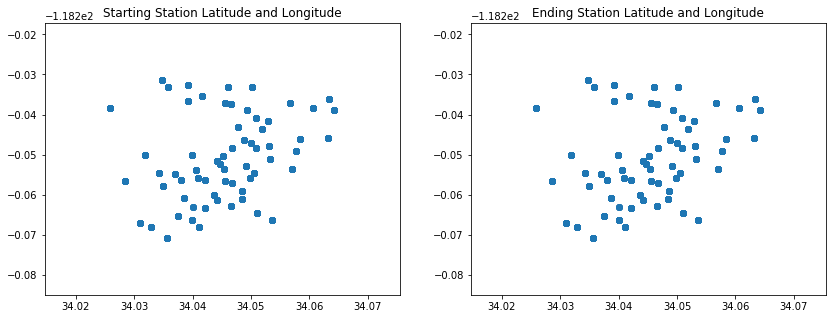

In [22]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(metro_bike_trip_df['Starting_Station_Latitude'],metro_bike_trip_df['Starting_Station_Longitude'],alpha=0.3)
plt.title("Starting Station Latitude and Longitude")
plt.subplot(1,2,2)
plt.scatter(metro_bike_trip_df['Ending_Station_Latitude'],metro_bike_trip_df['Ending_Station_Longitude'],alpha=0.3)
plt.title("Ending Station Latitude and Longitude")
plt.show()

#### Matching plots indicate there are no start points that had no drop off and vice-versa this would seem logical

In [23]:
sorted(metro_bike_trip_df['Starting_Station_ID'].unique())==sorted(metro_bike_trip_df['Ending_Station_ID'].unique())

True

#### This confirms that the Starting and Ending Stations sets are identical as expected

#### Now visually showing the location of stations on a map

In [24]:
bike_map1=folium.Map([metro_bike_trip_df['Starting_Station_Latitude'].values[0],metro_bike_trip_df['Starting_Station_Longitude'].values[0]])
for station in metro_bike_trip_df['Starting_Station_ID'].unique():
    lat=metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_ID']==station]['Starting_Station_Latitude'].values[0]
    lon=metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_ID']==station]['Starting_Station_Longitude'].values[0]
    marker=folium.Marker([lat,lon],popup=str(station))
    marker.add_to(bike_map1)

bike_map1

#### All the Bike Stations are located in Downtown LA.

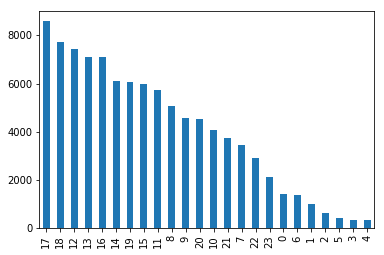

In [25]:
# Finding the most popular pick up time of any bike 
metro_bike_trip_df.Start_Time.dt.hour.value_counts().plot(kind='bar')
plt.show()

#### Most of the trips start after work hours (between 17.00 and 19.00). Lunch time is also active (between 12.00 and 14.00). It seems everybody sleeps after midnight, between 00.00 and 06.00 is the least active time.

In [26]:
# Finding the most popular trip
trips_df = pd.DataFrame()
trips_df = metro_bike_trip_df.groupby(['Starting_Station_ID','Ending_Station_ID']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips', ascending = False)
trips_df['Starting_Station_ID'] = trips_df['Starting_Station_ID'].astype('str')
trips_df['Ending_Station_ID'] = trips_df['Ending_Station_ID'].astype('str')
trips_df["Trip"] = trips_df["Starting_Station_ID"] + " to " + trips_df["Ending_Station_ID"]
trips_df = trips_df[:10]
trips_df = trips_df.drop(['Starting_Station_ID', "Ending_Station_ID"], axis = 1)
trips_df = trips_df.reset_index()

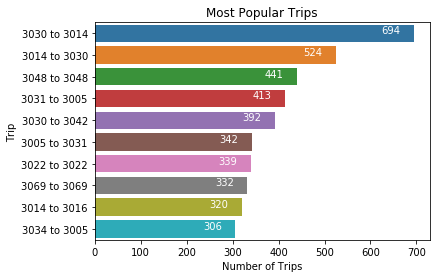

In [27]:
# Most popular trips
g = sns.barplot('Number of Trips','Trip', data = trips_df)
plt.title("Most Popular Trips")
for index, row in trips_df.iterrows():
    g.text(row['Number of Trips']-50,index,row['Number of Trips'], 
             color='white', ha="center",fontsize = 10)
plt.show()

#### Since the popular trip are very high, such stations should always be looked after and maintained. Such stations should never go out of bikes as people over there prefer to use bikes instead walking or using any other mode of transport. This will build a strong bike network for the city fo LA.  

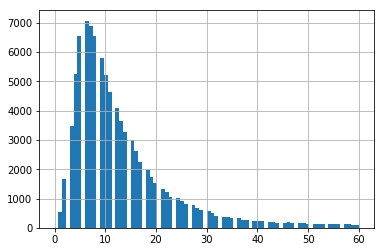

In [28]:
#Finding the trip duration 
# converting duration in min
metro_bike_trip_df['Duration']/=60  
metro_bike_trip_df['Duration'].hist(bins=80,range=(0,60))
plt.show()

#### It seems that majority of the trips are 5-30 minutes long beacuse according to LA metro rides less than 30 min are free for all pass type and after that they charge 1.75 dollar for each 30 min.

#### We are done with finding the popular bike, popular stations, popular location and popular trip. We will now find the popular passholder or the customer using the bikes and making maximum trips.

In [29]:
#Finding the famous passholder type according to plan duration
metro_bike_trip_df[['Trip_ID','Passholder_Type','Plan_Duration']].groupby(['Passholder_Type','Plan_Duration']).agg(['count'])/len(metro_bike_trip_df)*100

,,Trip_ID
,,count
Passholder_Type,Plan_Duration,
Flex Pass,365.0,7.360082
Monthly Pass,30.0,61.429083
Walk-up,0.0,31.210836


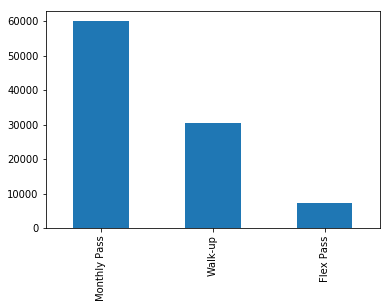

In [30]:
#Visually representing the passholder's type 
metro_bike_trip_df.Passholder_Type.value_counts().plot(kind=' bar')
plt.show()

#### People generally prefer taking a monthly pass instead of walk-up and flex pass. We can confirm the above passholder type by calculating the plan duration.

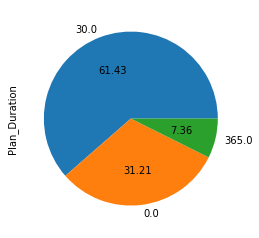

In [31]:
# Finding the Plan duration
metro_bike_trip_df.Plan_Duration.value_counts().plot(kind  ='pie', autopct='%.2f')
plt.show()

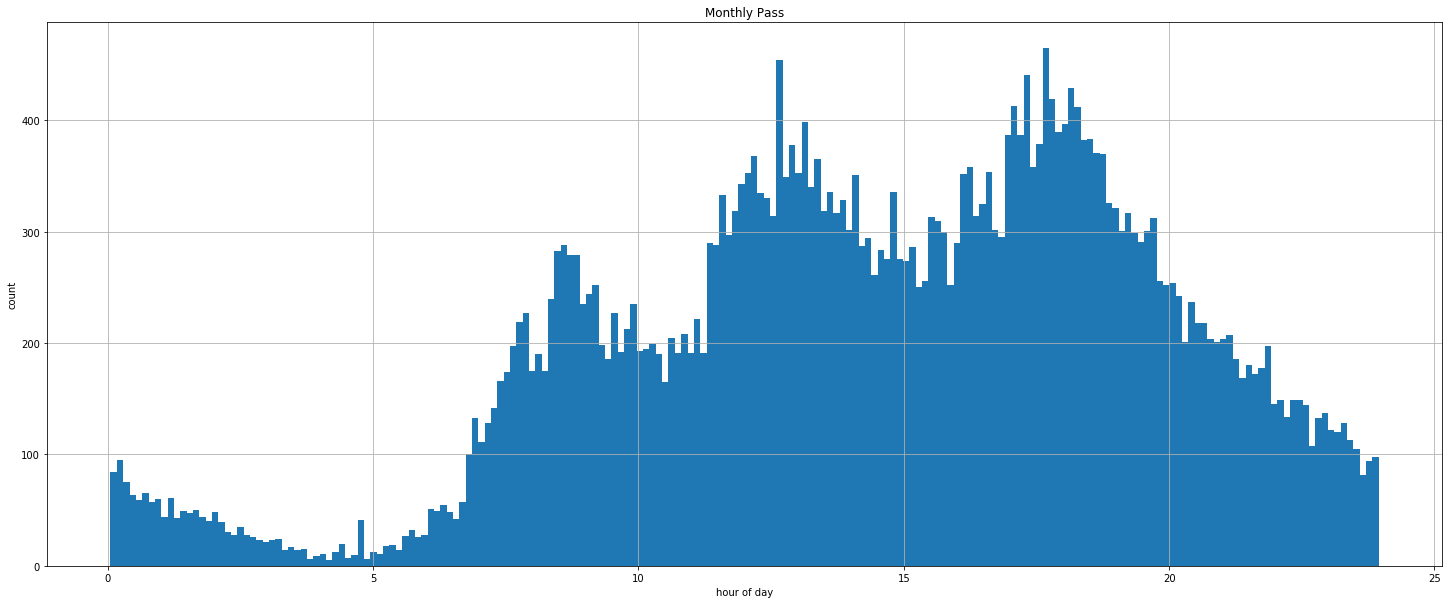

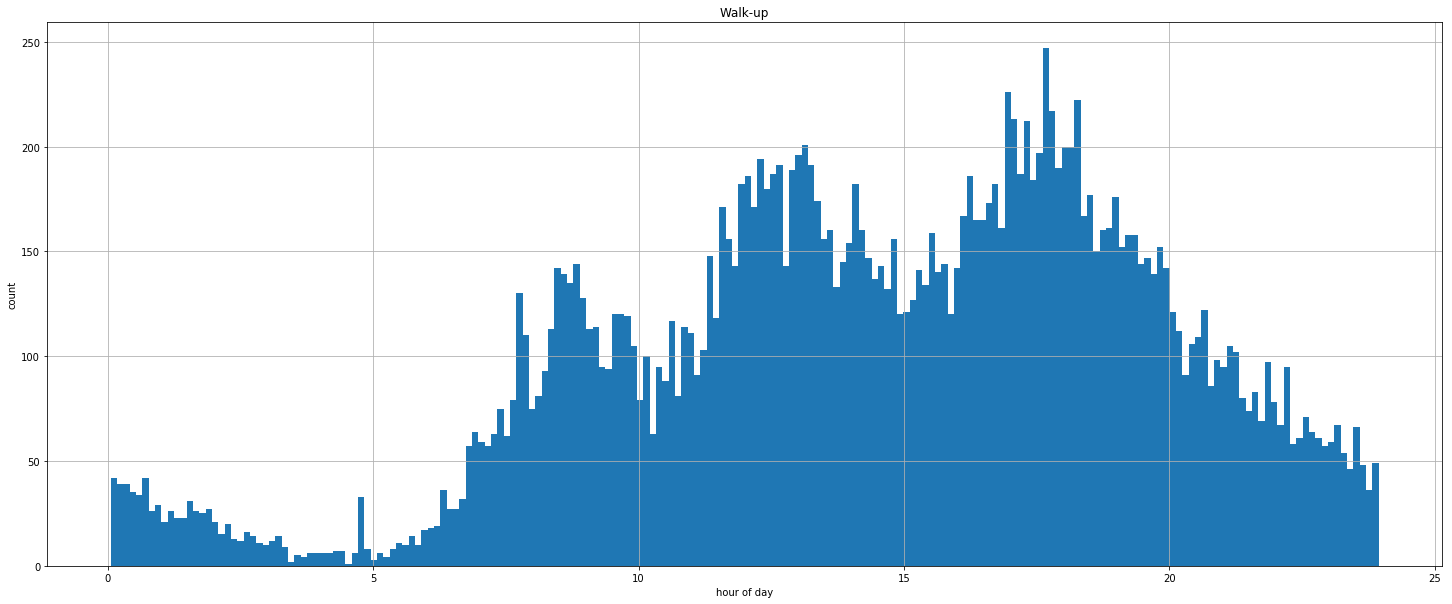

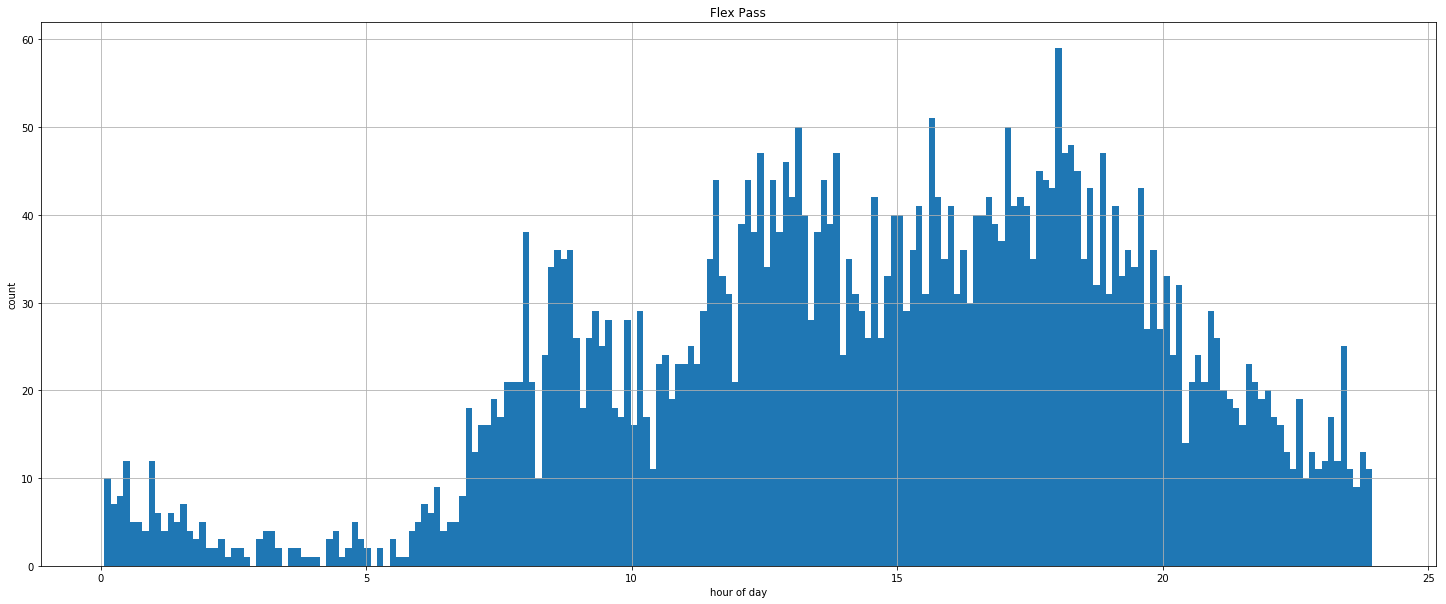

In [32]:
#Finding the peak time for different passholders
#Separating date and time of Start Time and End Time 

new_dates, new_times = zip(*[(d.date(),d.time()) for d in metro_bike_trip_df['Start_Time']])
metro_bike_trip_df = metro_bike_trip_df.assign(new_start_date=new_dates, new_start_time=new_times)

new_dates, new_times = zip(*[(d.date(),d.time()) for d in metro_bike_trip_df['End_Time']])
metro_bike_trip_df = metro_bike_trip_df.assign(new_end_date=new_dates, new_end_time=new_times)

peaktime=pd.DataFrame([(d.hour+d.minute/60) for d in metro_bike_trip_df['new_start_time']])
peaktime['Passholder_Type']=metro_bike_trip_df['Passholder_Type']
for peak_hour in ['Monthly Pass','Walk-up','Flex Pass']:
    (peaktime[peaktime['Passholder_Type']==peak_hour][0]).hist(bins=200,figsize=(25,10))
    plt.xlabel('hour of day')
    plt.ylabel('count')
    plt.title(peak_hour)
    plt.show()


#### With the above graph we can say that the peak time for all the different passholder is almost same just the count of customers differs. 

In [33]:
# Finding the co relation between different passholder type and  different stations
data = list()
for ph in ["Flex Pass", "Monthly Pass", "Walk-up"]:
    data.append(metro_bike_trip_df.loc[metro_bike_trip_df["Passholder_Type"] == ph, "Starting_Station_ID"].dropna().value_counts())

stations = pd.concat(data, axis=1, sort=False)
station_names = list(stations.index)
stations = stations.reset_index(drop=True)
stations.columns = ["Flex Pass", "Monthly Pass", "Walk-up"]
stations = stations.apply(lambda s: s/s.sum())

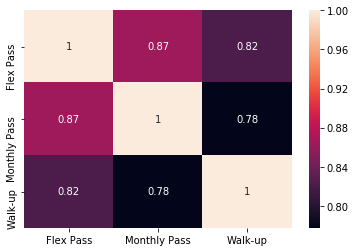

In [34]:
# Correlation Matrix
sns.heatmap(stations.corr(), annot=True)
plt.show()

#### The popularity of the different stations are relativelly equal betweeen different passes. We see the highest correlation between the flex and monthly pass.

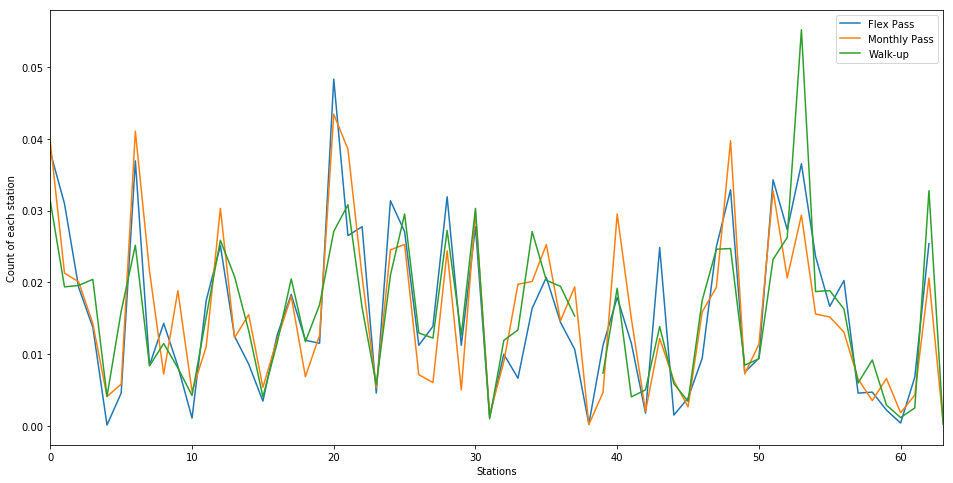

In [35]:
stations.plot(figsize=(16, 8))
plt.xlabel("Stations")
plt.ylabel("Count of each station")
plt.legend()

#### Many stations are very similar between the passes. Lets find the ones that differs the most between the monthly and daily pass.

In [36]:
diff = stations["Monthly Pass"] - stations["Walk-up"]
diff = diff.apply(abs).nlargest(5).index.map(lambda s: station_names[s])
print(" The 5 stations that differs most between the monthly and walk-up pass\n ",list(diff))

 The 5 stations that differs most between the monthly and walk-up pass
  [3069, 3030, 3014, 3064, 3016]


#### Bikes in some of these stations might be used daily so people over there prefer taking monthly pass instead of paying daily while some of those stations are used by people visiting near to that location as it may be a tourist location.

In [37]:
#Finding the trip duration by passholder type
# Calculating trip duration based on tripduration(Seconds)
trip_duration_for_passholder = pd.DataFrame()
trip_duration_for_passholder['Avg. Trip Duration'] = round(metro_bike_trip_df.groupby('Passholder_Type')['Duration'].mean(),2)
trip_duration_for_passholder = trip_duration_for_passholder.reset_index()
trip_duration_for_passholder['Passholder_Type'] = trip_duration_for_passholder['Passholder_Type'].astype('object')

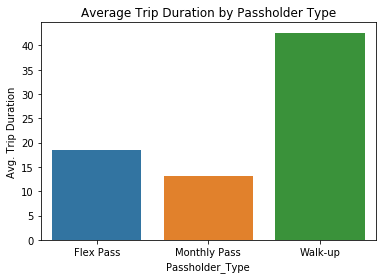

In [38]:
# Average Trip Duration by Passholder Type 
average_trip_plot = sns.barplot('Passholder_Type', 'Avg. Trip Duration', data = trip_duration_for_passholder)
plt.Figure(figsize=(15,12))
plt.title("Average Trip Duration by Passholder Type")
# for index, row in trip_duration_for_passholder.iterrows():
#     average_trip_plot.text(index,row['Avg. Trip Duration']-200,(str(row['Avg. Trip Duration'])+"  Seconds"), 
#              color='white', ha="center", fontsize = 10)
plt.show()

#### Even though monthly pass frequency is high, walk-up people genreally prefer to use bike for longer duration. So we can say that monthly pass user are one that use bikes for near by location. 

#### Our goal is to predict the number of people using walk-up, monthly pass or flex pass for future trips. 

# Performing Modeling

In [39]:
# To do so lets first find the distance between the starting and endind point by using starting latitude longitude with ending latitude longitude
l = []
for i in range(97825):
    l.append(distance_on_unit_sphere(metro_bike_trip_df['Starting_Station_Latitude'].iloc[i],
                                     metro_bike_trip_df['Starting_Station_Longitude'].iloc[i],
                                     metro_bike_trip_df['Ending_Station_Latitude'].iloc[i],
                                     metro_bike_trip_df['Ending_Station_Longitude'].iloc[i]))


In [40]:
temp = pd.DataFrame(data=[metro_bike_trip_df['Duration'],
                          metro_bike_trip_df['Starting_Station_Latitude'],
                          metro_bike_trip_df['Starting_Station_Longitude'],
                          metro_bike_trip_df['Ending_Station_Latitude'],
                          metro_bike_trip_df['Ending_Station_Longitude'],
                          metro_bike_trip_df['Plan_Duration']],
                          index=['Duration',
                                 'Starting_Station_Latitude',
                                 'Starting_Station_Longitude',
                                 'Ending_Station_Latitude',
                                 'Ending_Station_Longitude',
                                 'Plan_Duration'])

In [41]:
distance = pd.DataFrame({'Distance':l})
new_metro_bike_trip_df = temp.T
print("Shape of new train ",new_metro_bike_trip_df.shape)
print ("Shape of distance ",distance.shape)

Shape of new train  (97825, 6)
Shape of distance  (97825, 1)


In [42]:
new_metro_bike_trip_df = new_metro_bike_trip_df.reset_index(drop=True)
new_metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97825 entries, 0 to 97824
Data columns (total 6 columns):
Duration                      97825 non-null float64
Starting_Station_Latitude     97825 non-null float64
Starting_Station_Longitude    97825 non-null float64
Ending_Station_Latitude       97825 non-null float64
Ending_Station_Longitude      97825 non-null float64
Plan_Duration                 97825 non-null float64
dtypes: float64(6)
memory usage: 4.5 MB


In [43]:
new_metro_bike_trip_df = pd.concat([distance,
                         new_metro_bike_trip_df,
                         pd.get_dummies(data=metro_bike_trip_df['Passholder_Type']).reset_index(),
                         pd.get_dummies(data=metro_bike_trip_df['Trip_Route_Category'],drop_first=True).reset_index()],
                         axis=1)
new_metro_bike_trip_df = new_metro_bike_trip_df.drop('index',axis=1)
new_metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97825 entries, 0 to 97824
Data columns (total 11 columns):
Distance                      97825 non-null float64
Duration                      97825 non-null float64
Starting_Station_Latitude     97825 non-null float64
Starting_Station_Longitude    97825 non-null float64
Ending_Station_Latitude       97825 non-null float64
Ending_Station_Longitude      97825 non-null float64
Plan_Duration                 97825 non-null float64
Flex Pass                     97825 non-null uint8
Monthly Pass                  97825 non-null uint8
Walk-up                       97825 non-null uint8
Round Trip                    97825 non-null uint8
dtypes: float64(7), uint8(4)
memory usage: 5.6 MB


In [44]:
print("There are 3 different types of Passholder : ")
metro_bike_trip_df['Passholder_Type'].value_counts()

There are 3 different types of Passholder : 


Monthly Pass    60093
Walk-up         30532
Flex Pass        7200
Name: Passholder_Type, dtype: int64

### Performing modeling by using logistic regression to predict whether  the passholder type is "Walk-up" or "not"

In [45]:
# USING LOGISTIC REGRESSION TO PREDICT WHETHER THE PASSHOLDER TYPE IS "Walk-up" OR "Not"
modeling_techniques_and_prediction(new_metro_bike_trip_df, 'Walk-up','logistic' )

C:\Users\18572\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

 The classification report for Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22258
           1       1.00      1.00      1.00     10025

   micro avg       1.00      1.00      1.00     32283
   macro avg       1.00      1.00      1.00     32283
weighted avg       1.00      1.00      1.00     32283

The Confusion Matrix for Logistic Regression is: 
 [[22258     0]
 [    0 10025]]


#### With the help of Logistic Regression and through the results of confusion matrix we were able to predict the walk-up passholder accurately.

### Peforming Modeling by using Random forest classifier to predict whether the passholder type is "Monthly Pass" or "not"


In [46]:
# USING RANDOM FOREST CLASSIFIER TO PREDICT WHETHER THE PASSHOLDER TYPE IS "Monthly Pass" OR "Not"
modeling_techniques_and_prediction(new_metro_bike_trip_df, 'Monthly Pass','random' )

C:\Users\18572\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 The classification report for Random Forest is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12334
           1       1.00      1.00      1.00     19949

   micro avg       1.00      1.00      1.00     32283
   macro avg       1.00      1.00      1.00     32283
weighted avg       1.00      1.00      1.00     32283

The Confusion Matrix for Random Forest is: 
 [[12334     0]
 [    0 19949]]


#### With the help of Random Forest Classifier and through the results of confusion matrix we were able to predict the monthly passholder accurately. 

### Peforming Modeling by using Decision Tree classifier to predict whether the passholder type is "Flex Pass" or "not"


In [47]:
# USING DECISION TREE TO PREDICT WHETHER THE PASSHOLDER TYPE IS "Flex Pass OR "Not"
modeling_techniques_and_prediction(new_metro_bike_trip_df, 'Flex Pass','decision' )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

 The classification report for Decision Tree is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29942
           1       1.00      1.00      1.00      2341

   micro avg       1.00      1.00      1.00     32283
   macro avg       1.00      1.00      1.00     32283
weighted avg       1.00      1.00      1.00     32283

The Confusion Matrix for Decision Tree is: 
 [[29942     0]
 [    0  2341]]


#### With the help of Decision Tree Classifier and through the results of confusion matrix we were able to predict the flex passholder accurately.

### Conclusion: 
* Successfully delivered and represented the popular stations,locations, bikes, trips and passholders
* Imputed the missing value for the location and visually represented the stations location on a map
* Visually represented the peak time of people using the bikes and also calculated the average duration of trips
* Finally with the help of passholder we demonstrated accurate models of the riding patterns of different passholder types. 
* Therefore, with all the above result, more people are likely to enroll for monthly pass which means the stations should be maintained and improved in order to increase more customers for building a good bike sharing network.
